# Cocktail DB Visualizer Project

Networkx 모듈을 활용해서 아래 책을 통해 공부한 내용들 정리 및 실습
* Graph Representation Learning
* Network Science

In [1]:
import networkx as nx
import requests, json
import numpy as np

## Read json from recipe DB

In [2]:
json_path = 'https://raw.githubusercontent.com/JunPyoPark/cocktails/master/src/data/cocktails.json'
url = requests.get(json_path)
text = url.text
data = json.loads(text)

In [3]:
len(data) # 80개의 레시피

80

In [4]:
data[0]

{'iba': True,
 'name': 'Vesper',
 'colors': '#D88317',
 'glass': 'martini',
 'category': 'Before Dinner Cocktail',
 'ingredients': [{'unit': 'cl', 'amount': 6, 'ingredient': 'Gin'},
  {'unit': 'cl', 'amount': 1.5, 'ingredient': 'Vodka'},
  {'unit': 'cl', 'amount': 0.75, 'ingredient': 'Lillet Blonde'}],
 'garnish': 'Lemon twist',
 'preparation': 'Shake and strain into a chilled cocktail glass.'}

In [5]:
ingredient_list = data[0]['ingredients']
ingredient_list

[{'unit': 'cl', 'amount': 6, 'ingredient': 'Gin'},
 {'unit': 'cl', 'amount': 1.5, 'ingredient': 'Vodka'},
 {'unit': 'cl', 'amount': 0.75, 'ingredient': 'Lillet Blonde'}]

## Create Graph(Network) from recipe DB

In [6]:
import networkx as nx
from itertools import combinations 
G = nx.Graph()

In [7]:
total_ingredients = []
for recipe_num in range(len(data)):
    recipe = data[recipe_num]
    ingredients = recipe['ingredients']
    
    ingredient_list = []
    for ingredient in ingredients:
        try:
            ingredient_list.append(ingredient['ingredient'])
        except:
            pass
    
    # add nodes
    G.add_nodes_from(ingredient_list)
    
    # add edges
    edges = list(combinations(ingredient_list, 2))
    G.add_edges_from(edges)

## Visualize

In [8]:
import matplotlib.pyplot as plt

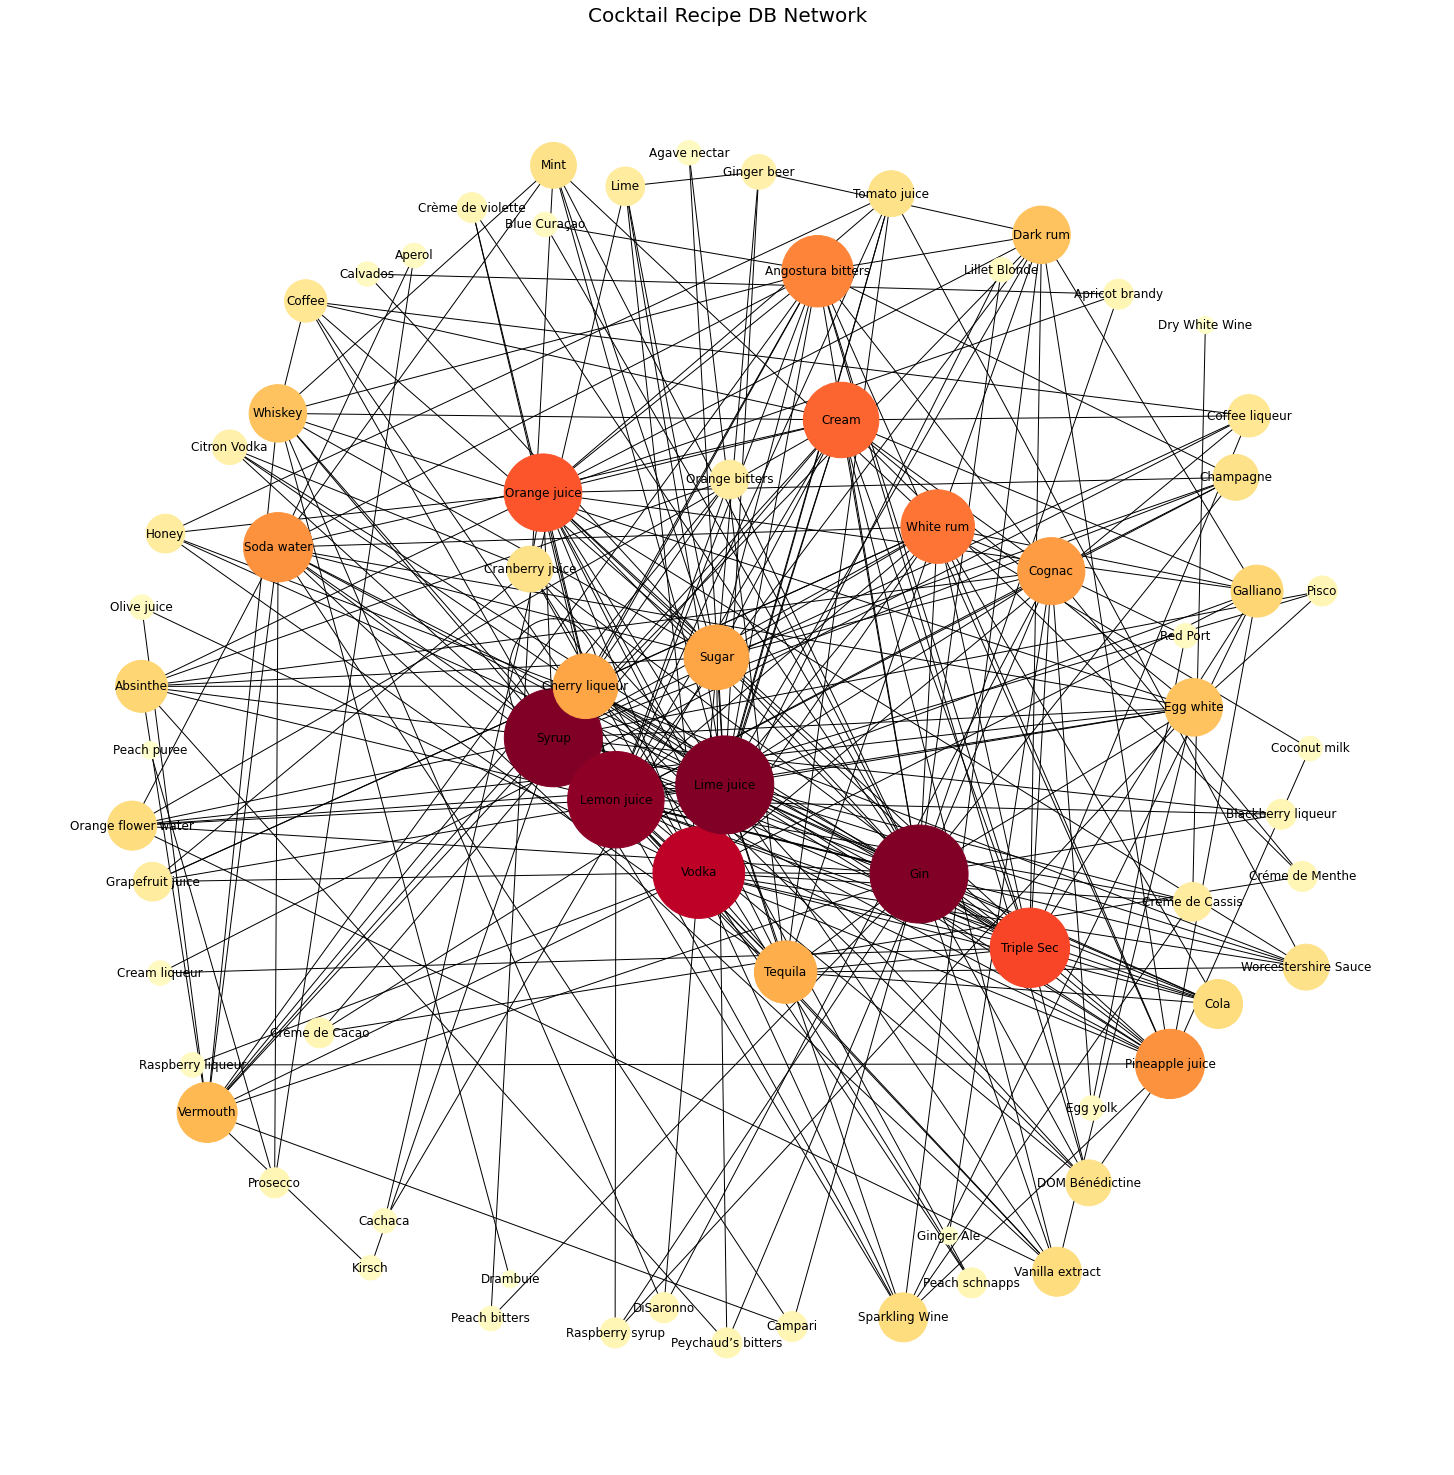

In [9]:
dig = dict(nx.degree(G)) # degree of network
d = np.array(list(dig.values()))
pos=nx.spring_layout(G,k=2) # positions for all nodes
plt.figure(figsize=(20,20)) #Control figure size
nx.draw(G,pos,with_labels=True
        ,node_size = d * 300 # node size
        ,node_color= d # data for label color
        ,font_size= 12 # labelsize
        ,cmap=plt.cm.YlOrRd # color_map
       )
plt.title('Cocktail Recipe DB Network',size=20);
plt.savefig('Graph.png', format="PNG") # Save figure